In [52]:
import numpy
import pandas as pd

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

from sklearn.preprocessing import LabelEncoder

## Importing DataSets

In [2]:
store_data = pd.read_csv('./dataset/stores.csv')
features_data = pd.read_csv('./dataset/features.csv')
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

### function to get understanding of Dataset


In [3]:
def data_understanding(df):
    print(df.columns)
    print("==========================================")
    print(df.dtypes)
    print("==========================================")
    print(df.shape)
    print("==========================================")
    print(df.isnull().sum())
    print("==========================================")
    print(df.head())
    print("==========================================")
    print(df.describe())

### Data understanding

In [4]:
data_understanding(store_data)

Index(['Store', 'Type', 'Size'], dtype='object')
Store     int64
Type     object
Size      int64
dtype: object
(45, 3)
Store    0
Type     0
Size     0
dtype: int64
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [5]:
data_understanding(train_data)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object
(421570, 5)
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75% 

In [6]:
data_understanding(features_data)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
(8190, 12)
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-

### Combining store, features and train to create a merged dataset

In [7]:
df = train_data.merge(features_data, how="inner", on=['Store', 'Date']).merge(store_data, how="inner", on=["Store"])

In [8]:
data_understanding(df)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
Type             object
Size              int64
dtype: object
(421570, 17)
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment      

# Cleaning merged df

### Our dataset has the following problems
1. There are 2 holiday columns
2. Weekly sales values is in negative
3. Markdown has lot of null values
4. Data is not normalized

In [9]:
# dropping isholiday

df.drop('IsHoliday_y', inplace=True, axis="columns")

In [10]:
df.shape

(421570, 16)

### Converting date column to datetime

In [11]:
df["Date"] = pd.to_datetime(df["Date"])

### Weekly sales

In [12]:
(df['Weekly_Sales']<=0).sum()

1358

In [13]:
df.shape

(421570, 16)

In [14]:
df = df.drop(df[df['Weekly_Sales'] <= 0].index)

In [15]:
df.shape

(420212, 16)

### Markdowns

In [16]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [17]:
# filling nan values with 0
df = df.fillna(0)

In [18]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [19]:
print(df["Date"].min())
print(df["Date"].max())

2010-02-05 00:00:00
2012-10-26 00:00:00


In [20]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [21]:
print(df["Date"].value_counts())
print(df["IsHoliday_x"].unique())

Date
2011-12-23    3018
2011-11-25    3016
2011-12-09    3001
2011-12-16    3000
2012-02-17    2999
              ... 
2010-08-20    2896
2010-05-28    2896
2010-07-09    2895
2010-08-13    2893
2010-08-27    2893
Name: count, Length: 143, dtype: int64
[False  True]


In [22]:
holiday_dates = df[df['IsHoliday_x'] == True]


unique_holiday_dates = holiday_dates['Date'].unique()
unique_holiday_dates

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

## EDA

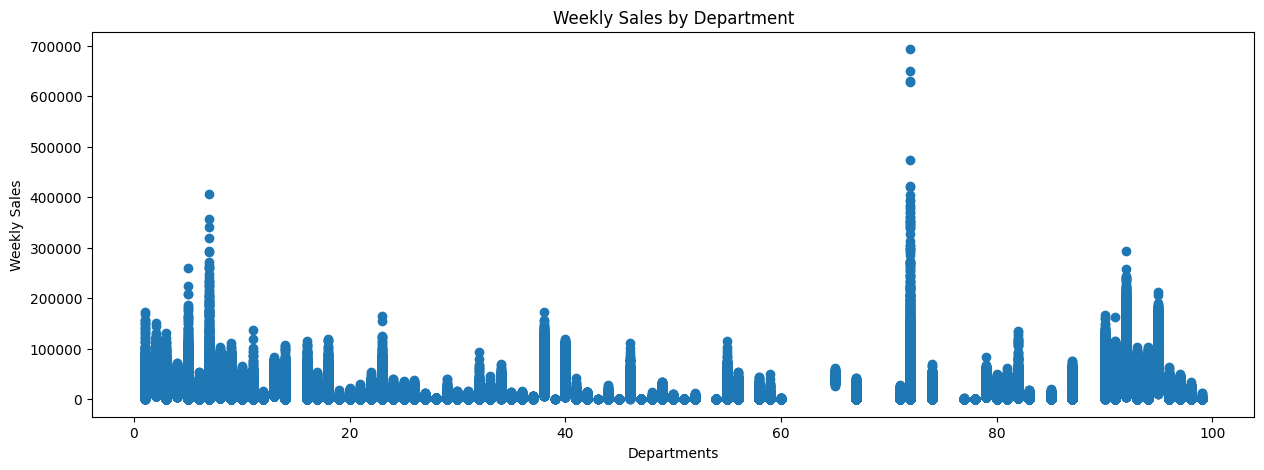

In [23]:
x = df['Dept']
y = df['Weekly_Sales']

plt.figure(figsize=(15,5))

plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Department')

plt.scatter(x,y)

plt.show()

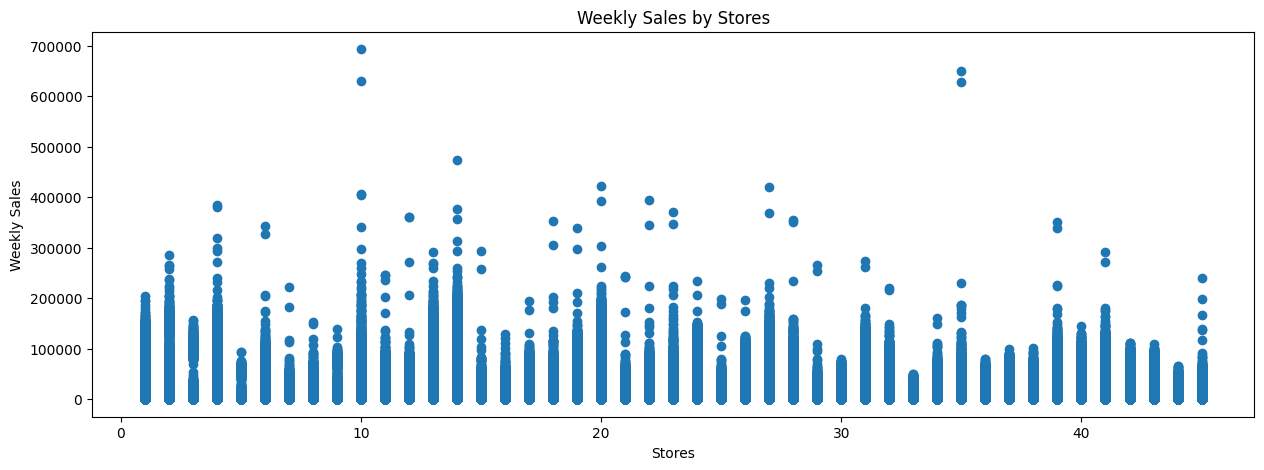

In [24]:
x = df['Store']
y = df['Weekly_Sales']

plt.figure(figsize=(15,5))

plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Stores')

plt.scatter(x,y)

plt.show()

### Segregating year and month from date 

In [25]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

In [26]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'year', 'month'],
      dtype='object')

### Weekly sales with months 

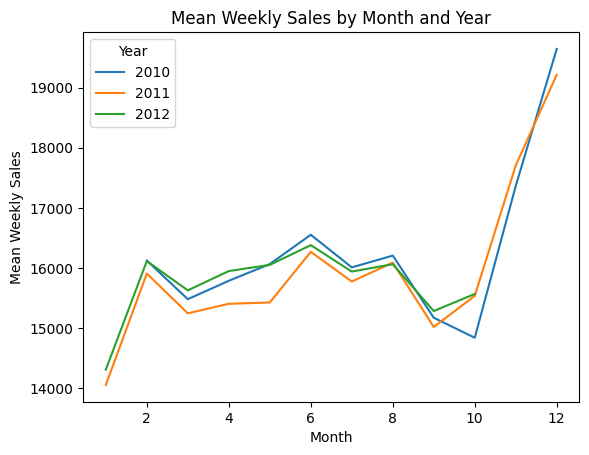

In [27]:
# Grouping by 'year' and 'month' and calculating the mean of 'Weekly_Sales'
grouped_data = df.groupby(['month', 'year'])['Weekly_Sales'].mean().unstack()

# Plotting the grouped data
grouped_data.plot()

plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales by Month and Year')
plt.legend(title='Year')

plt.show()

### Relation between Fuel Price and Weekly sales

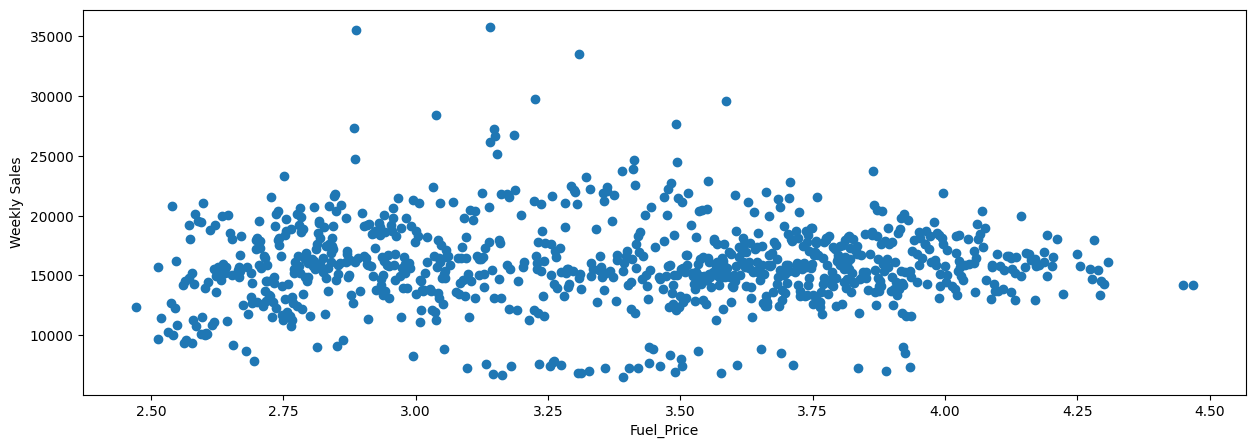

In [28]:
result = df.groupby('Fuel_Price')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(15,5))

plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')

plt.scatter(result['Fuel_Price'], result['Weekly_Sales'])

plt.show()

### Relation between Temperature and Weekly sales

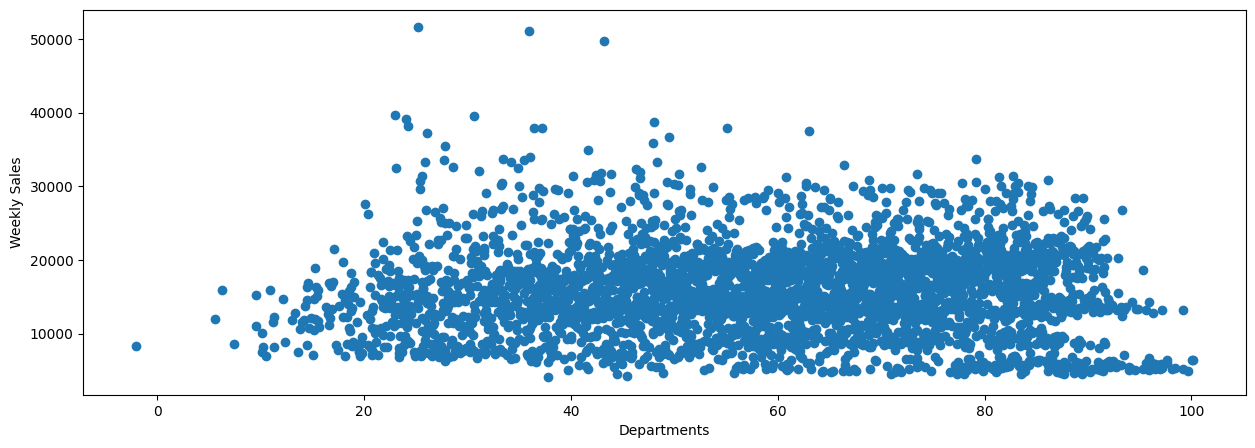

In [29]:
result = df.groupby('Temperature')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(15,5))

plt.xlabel('Departments')
plt.ylabel('Weekly Sales')

plt.scatter(result['Temperature'], result['Weekly_Sales'])

plt.show()

### Relation between Fuel Price and Weekly sales

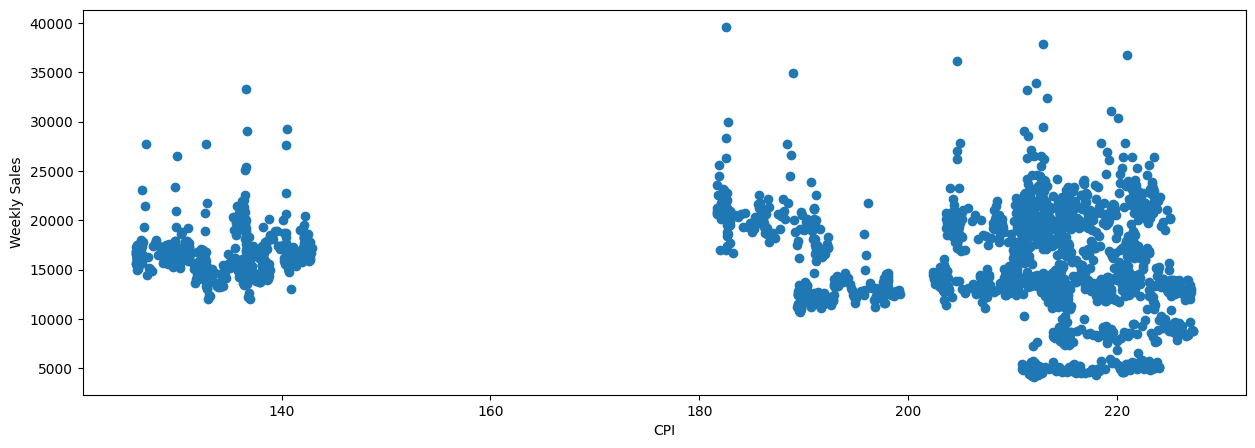

In [30]:
result = df.groupby('CPI')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(15,5))

plt.xlabel('CPI')
plt.ylabel('Weekly Sales')

plt.scatter(result['CPI'], result['Weekly_Sales'])

plt.show()

### Relation between Unemployment and Weekly sales

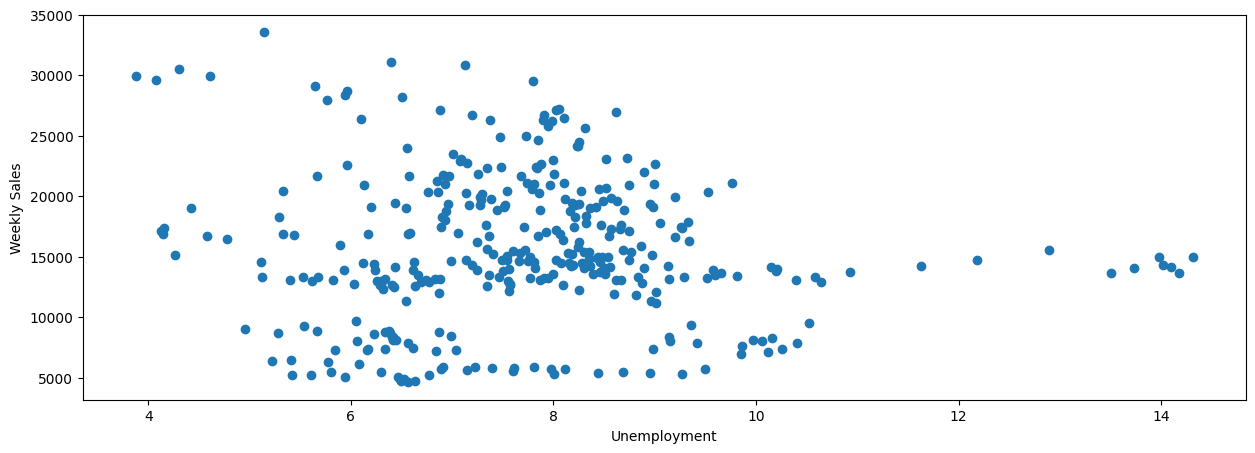

In [31]:
result = df.groupby('Unemployment')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(15,5))

plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')

plt.scatter(result['Unemployment'], result['Weekly_Sales'])

plt.show()

### Label encoding

In [32]:
list(df.select_dtypes(['object']).columns)

['Type']

In [33]:
# encoding data
label_encoder = LabelEncoder()

df['Type'] = label_encoder.fit_transform(df['Type'])

### Pair Plot

In [ ]:
sns.pairplot(df)

### Coorelational Matrix

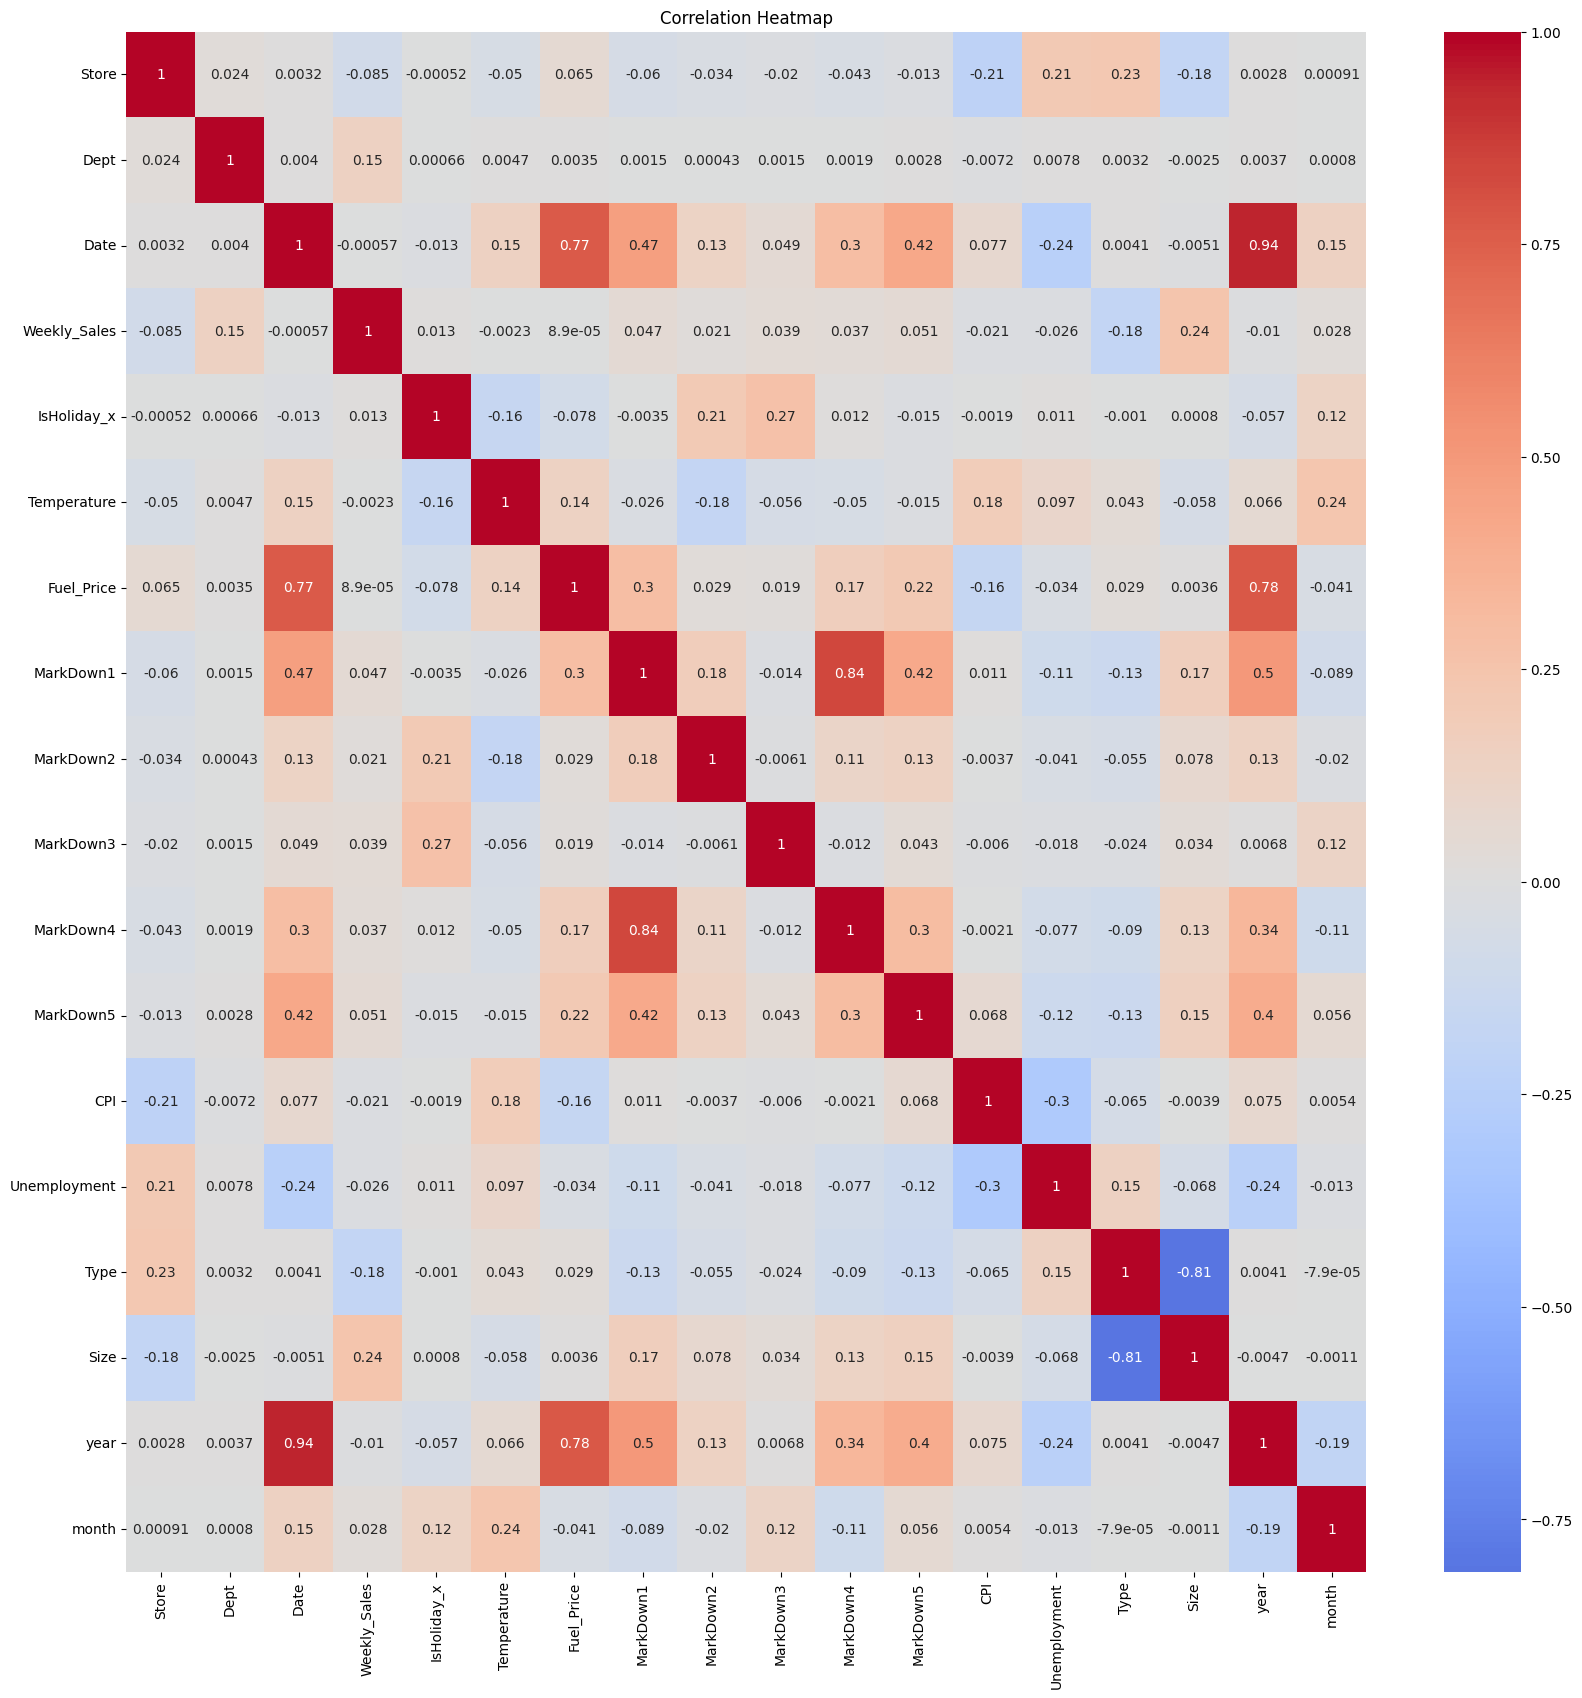

In [34]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()

## Creating datetime index dataframe

In [35]:
df.set_index('Date', inplace=True) #seting date as index

In [ ]:
df_week = df.resample('W').mean() #resample data as weekly


df_week['Weekly_Sales'].plot()
df['Weekly_Sales']

plt.title('Average Sales - Weekly')

plt.figure(figsize=(16,6))
plt.show()

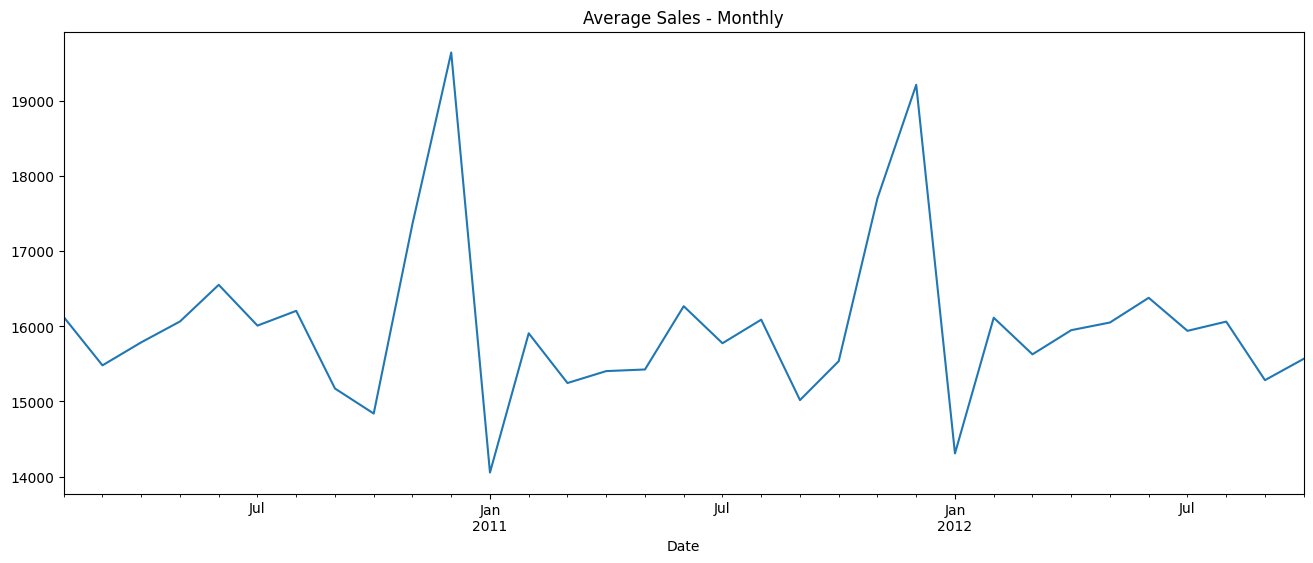

In [37]:
df_month = df.resample('MS').mean() # resampling as monthly

plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()

plt.title('Average Sales - Monthly')
plt.show()

# Time Series Forecasting

### Rolling average and standard deviation

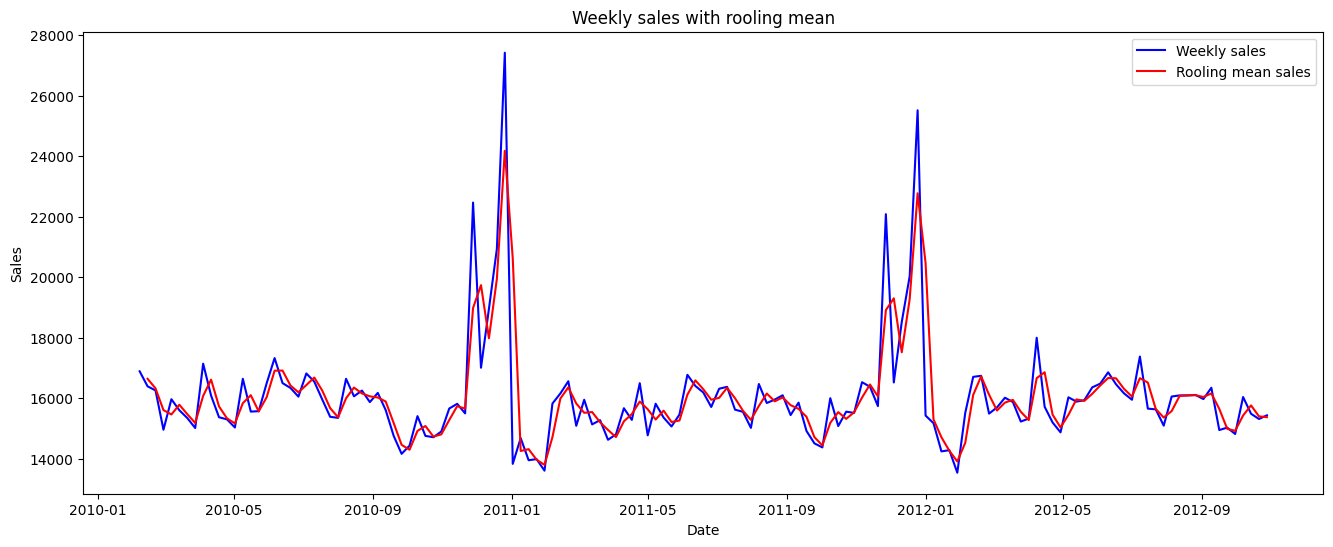

In [72]:
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales ')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Weekly sales with rooling mean")
plt.legend(["Weekly sales", "Rooling mean sales"])

plt.show()

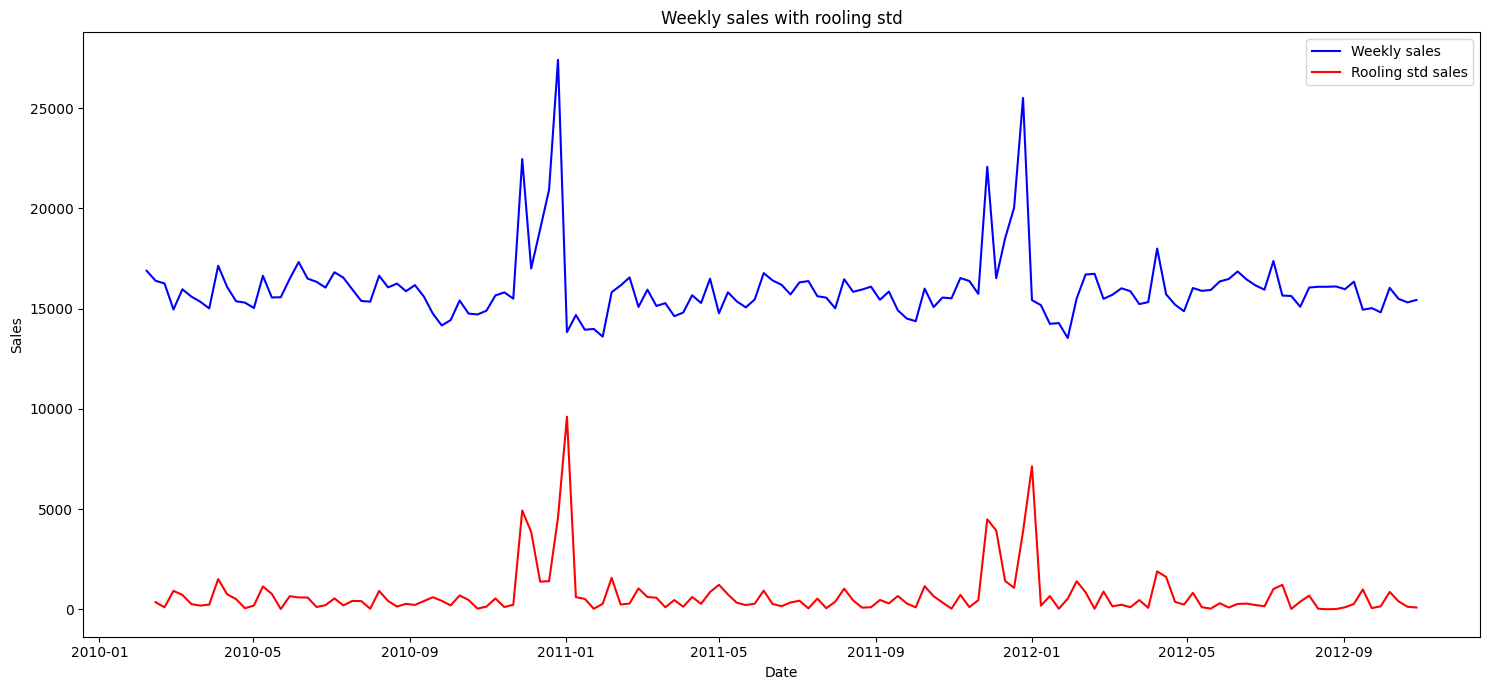

In [74]:
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_std, color='red', label='Rolling 2-Week Mean')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Weekly sales with rooling std")
plt.legend(["Weekly sales", "Rooling std sales"])

plt.tight_layout()
plt.show()

df.index

### Decomposing

In [ ]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)

In [ ]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})

plt.show()

### Making Data Stationary

### Difference

In [ ]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values